In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns


#  Train Dense network that can add two numbers

In [2]:
# make NN
l = inputs = layers.Input(shape=(2,))
# Hidden layers
l = layers.Dense(4, activation="relu")(l)
l = layers.Dense(4, activation="relu")(l)
# Output layer
l = outputs = layers.Dense(1)(l)


model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss=keras.losses.mae,
              metrics=["mse"])

x=np.random.randint(0, 1000, size=(50000,2))
y=(x[:,0]+x[:,1])

hist = model.fit(x,y, epochs=100, batch_size=100,
                 callbacks=[tf.keras.callbacks.EarlyStopping(monitor="loss", patience=2,)],)



Epoch 1/100
500/500 [==============================] - 0s 794us/step - loss: 961.5784 - mse: 1110131.3750
Epoch 2/100
500/500 [==============================] - 0s 777us/step - loss: 891.6341 - mse: 982852.0625
Epoch 3/100
500/500 [==============================] - 0s 750us/step - loss: 743.2906 - mse: 731312.0625
Epoch 4/100
500/500 [==============================] - 0s 773us/step - loss: 522.6976 - mse: 409776.8750
Epoch 5/100
500/500 [==============================] - 0s 760us/step - loss: 273.2965 - mse: 120147.8672
Epoch 6/100
500/500 [==============================] - 0s 762us/step - loss: 158.3738 - mse: 44455.3008
Epoch 7/100
500/500 [==============================] - 0s 782us/step - loss: 118.3348 - mse: 33276.7031
Epoch 8/100
500/500 [==============================] - 0s 738us/step - loss: 85.9680 - mse: 26370.7207
Epoch 9/100
500/500 [==============================] - 0s 786us/step - loss: 61.8569 - mse: 17682.8867
Epoch 10/100
500/500 [==============================] - 0s 7

<AxesSubplot:>

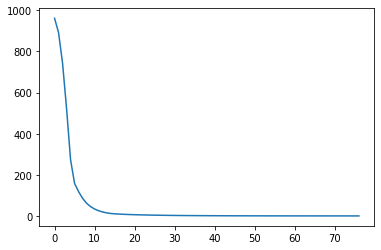

In [3]:
loss = hist.history['loss']
sns.lineplot(x=np.arange(len(loss)),y=loss)

##  evaluate the model

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [5]:
x=np.random.randint(0, 1000, size=(50000,2))

y=(x[:,0]+x[:,1])
model.evaluate(x,y,return_dict=True)

1563/1563 [==============================] - 1s 607us/step - loss: 0.0934 - mse: 0.3708


{'loss': 0.09341710805892944, 'mse': 0.3707934319972992}

## continue training with smaller learning rate, to improve percision

In [6]:
for learning_rate in [1e-5, 1e-7]:
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=keras.losses.mae,
                  metrics=["mae"])

    x=np.random.randint(0, 1000, size=(50000,2))
    y=(x[:,0]+x[:,1])


    hist = model.fit(x,y, epochs=100, batch_size=100, 
                     callbacks=[tf.keras.callbacks.EarlyStopping(monitor="loss", patience=2,)],)


Epoch 1/100
500/500 [==============================] - 0s 653us/step - loss: 0.0693 - mae: 0.0693
Epoch 2/100
500/500 [==============================] - 0s 775us/step - loss: 0.0706 - mae: 0.0706
Epoch 3/100
500/500 [==============================] - 0s 712us/step - loss: 0.0681 - mae: 0.0681
Epoch 4/100
500/500 [==============================] - 0s 658us/step - loss: 0.0678 - mae: 0.0678
Epoch 5/100
500/500 [==============================] - 0s 730us/step - loss: 0.0675 - mae: 0.0675
Epoch 6/100
500/500 [==============================] - 0s 657us/step - loss: 0.0680 - mae: 0.0680
Epoch 7/100
500/500 [==============================] - 0s 746us/step - loss: 0.0675 - mae: 0.0675
Epoch 8/100
500/500 [==============================] - 0s 766us/step - loss: 0.0664 - mae: 0.0664
Epoch 9/100
500/500 [==============================] - 0s 681us/step - loss: 0.0672 - mae: 0.0672
Epoch 10/100
500/500 [==============================] - 0s 670us/step - loss: 0.0644 - mae: 0.0644
Epoch 11/100
500/50

500/500 [==============================] - 0s 851us/step - loss: 0.0583 - mae: 0.0583
Epoch 72/100
500/500 [==============================] - 0s 751us/step - loss: 0.0583 - mae: 0.0583
Epoch 73/100
500/500 [==============================] - 0s 854us/step - loss: 0.0583 - mae: 0.0583
Epoch 74/100
500/500 [==============================] - 0s 900us/step - loss: 0.0583 - mae: 0.0583
Epoch 75/100
500/500 [==============================] - 0s 737us/step - loss: 0.0583 - mae: 0.0583
Epoch 76/100
500/500 [==============================] - 0s 866us/step - loss: 0.0582 - mae: 0.0582
Epoch 77/100
500/500 [==============================] - 0s 842us/step - loss: 0.0582 - mae: 0.0582
Epoch 78/100
500/500 [==============================] - 1s 1ms/step - loss: 0.0582 - mae: 0.0582
Epoch 79/100
500/500 [==============================] - 0s 797us/step - loss: 0.0582 - mae: 0.0582
Epoch 80/100
500/500 [==============================] - 0s 749us/step - loss: 0.0582 - mae: 0.0582
Epoch 81/100
500/500 [===

### evaluate again

In [7]:
x=np.random.randint(0, 1000, size=(50000,2))

y=(x[:,0]+x[:,1])
model.evaluate(x,y, return_dict=True)

1563/1563 [==============================] - 1s 630us/step - loss: 0.0594 - mae: 0.0594


{'loss': 0.05942995473742485, 'mae': 0.05942995473742485}

###  examples

In [8]:
model.predict(np.array([[-250,20000],
                        [50,55],
                        [100, 5.1]]))

array([[20226.283  ],
       [  104.99999],
       [  105.1    ]], dtype=float32)

# Let detect digits

In [9]:
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

from sklearn.metrics import  confusion_matrix

In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [11]:
x_train[0].shape, y_train

((28, 28), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

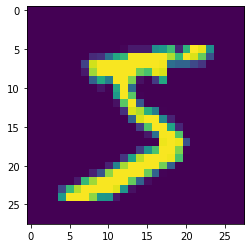

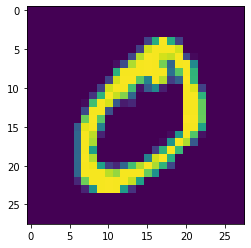

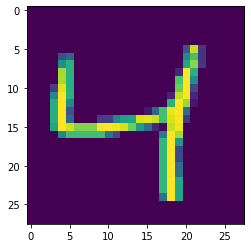

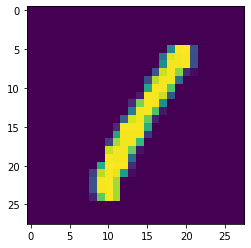

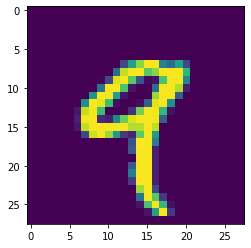

[None, None, None, None, None]

In [12]:
[plt.imshow(x_train[i]) and plt.show() for i in range(5)]

In [13]:

x_train = x_train/255
y_encoder = OneHotEncoder()
y_train = y_encoder.fit_transform(y_train.reshape(-1,1)).toarray()
y_train.shape, y_train[0]

((60000, 10), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

In [14]:
l = inputs = layers.Input(shape=(28,28,1))
l = layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(l)
l = layers.MaxPooling2D(pool_size=(3, 3))(l)
l = layers.Flatten()(l)
outputs = layers.Dense(10, activation="softmax")(l)

In [15]:
# Build the model
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                20490     
Total params: 20,810
Trainable params: 20,810
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile and fit
model.compile(optimizer="adam",
             loss=keras.losses.categorical_crossentropy,
             metrics=[keras.metrics.categorical_accuracy, ])

model.fit(x_train, y_train, epochs=100, callbacks=[keras.callbacks.EarlyStopping('loss', patience=2)])

Epoch 1/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2524 - categorical_accuracy: 0.9289
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0926 - categorical_accuracy: 0.9728
Epoch 3/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0723 - categorical_accuracy: 0.9787
Epoch 4/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0606 - categorical_accuracy: 0.9813
Epoch 5/100
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0536 - categorical_accuracy: 0.9836
Epoch 6/100
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0473 - categorical_accuracy: 0.9856
Epoch 7/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0426 - categorical_accuracy: 0.9872
Epoch 8/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0382 - categorical_accuracy: 0.9885
Epoch 9/100
1875/1875 [==============================] - 10s 5ms/step - lo

In [17]:
pred = model.predict(x_test/250)
pred

array([[2.2073554e-20, 2.6656112e-17, 2.0565127e-12, ..., 1.0000000e+00,
        4.8043343e-16, 4.1608874e-14],
       [7.8510284e-18, 9.6656793e-15, 1.0000000e+00, ..., 1.7967490e-31,
        2.7359553e-16, 5.9497359e-25],
       [7.0195634e-13, 9.9999619e-01, 4.0720489e-11, ..., 3.2139265e-12,
        5.9683248e-12, 2.1043911e-15],
       ...,
       [3.8721960e-28, 4.1610196e-19, 2.2050722e-22, ..., 8.7321689e-10,
        6.1796727e-13, 2.8058217e-11],
       [6.2990966e-18, 3.7423234e-20, 2.3950975e-15, ..., 1.4210999e-17,
        5.9912554e-07, 3.2298237e-15],
       [2.5447727e-20, 0.0000000e+00, 2.1017057e-13, ..., 4.0368000e-34,
        3.9310812e-17, 7.0083592e-26]], dtype=float32)

In [20]:
y_pred = y_encoder.inverse_transform(pred.round())
y_pred

array([[7],
       [2],
       [1],
       ...,
       [4],
       [5],
       [6]], dtype=uint8)

In [21]:
cm = confusion_matrix(y_pred, y_test.reshape(-1,1))
cm

array([[ 971,    0,    4,    1,    0,    2,    7,    0,    4,    2],
       [   0, 1129,    9,    1,    0,    1,    2,    2,    0,    3],
       [   3,    2,  990,    2,    0,    0,    2,    5,    2,    1],
       [   0,    1,    0,  992,    0,    8,    0,    0,    0,    1],
       [   0,    1,    3,    0,  972,    0,    3,    1,    1,    8],
       [   0,    0,    0,    6,    0,  879,    1,    0,    0,    1],
       [   2,    0,    1,    0,    3,    2,  940,    0,    0,    0],
       [   1,    1,   14,    4,    2,    0,    0, 1016,    4,    4],
       [   2,    1,   10,    2,    1,    0,    3,    1,  962,    1],
       [   1,    0,    1,    2,    4,    0,    0,    3,    1,  988]])

In [22]:
(cm/cm.sum(axis=1)*100).round(2).astype(int)

array([[97,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 98,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 98,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 99,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 98,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 99,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 99,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 97,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 97,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 98]])

# Simple Autoencoder for image compression

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
model_2 (Model)              (None, 64)                108736    
_________________________________________________________________
model_3 (Model)              (None, 28, 28)            109456    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


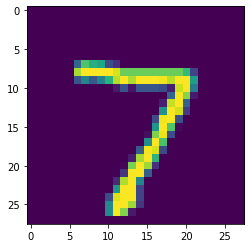

Epoch 1/100
1855/1875 [============================>.] - ETA: 0s - loss: 0.0860 - mean_absolute_error: 0.1485

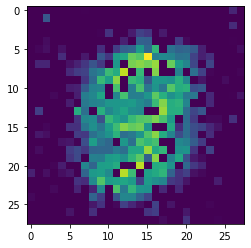

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0858 - mean_absolute_error: 0.1484
Epoch 2/100
1865/1875 [============================>.] - ETA: 0s - loss: 0.0674 - mean_absolute_error: 0.1348

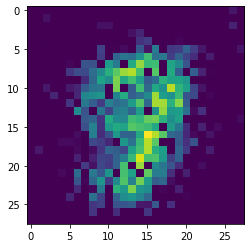

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0674 - mean_absolute_error: 0.1348
Epoch 3/100
1869/1875 [============================>.] - ETA: 0s - loss: 0.0582 - mean_absolute_error: 0.1217- ETA: 0s - loss: 0.0584 - mean_absolute_error: 0.1

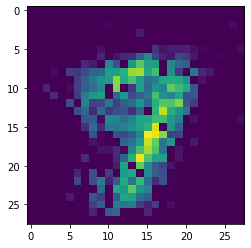

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0582 - mean_absolute_error: 0.1217
Epoch 4/100
1864/1875 [============================>.] - ETA: 0s - loss: 0.0506 - mean_absolute_error: 0.1086

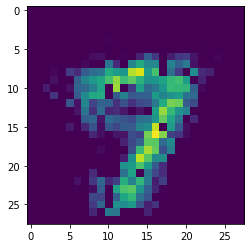

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0505 - mean_absolute_error: 0.1086
Epoch 5/100
1848/1875 [============================>.] - ETA: 0s - loss: 0.0452 - mean_absolute_error: 0.0985

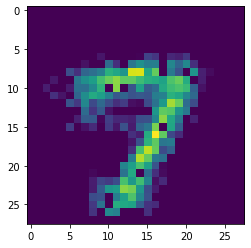

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0452 - mean_absolute_error: 0.0984
Epoch 6/100
1850/1875 [============================>.] - ETA: 0s - loss: 0.0413 - mean_absolute_error: 0.0911

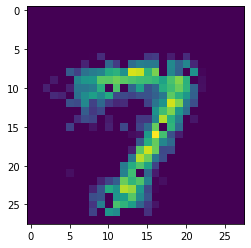

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0412 - mean_absolute_error: 0.0911
Epoch 7/100
1856/1875 [============================>.] - ETA: 0s - loss: 0.0385 - mean_absolute_error: 0.0856

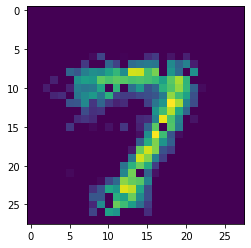

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0385 - mean_absolute_error: 0.0856
Epoch 8/100
1862/1875 [============================>.] - ETA: 0s - loss: 0.0362 - mean_absolute_error: 0.0812

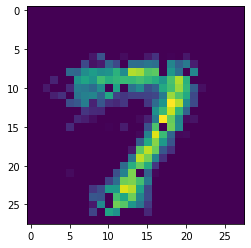

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0362 - mean_absolute_error: 0.0812
Epoch 9/100
1869/1875 [============================>.] - ETA: 0s - loss: 0.0342 - mean_absolute_error: 0.0777

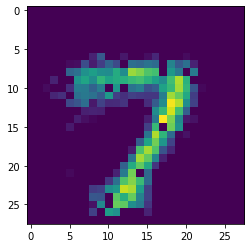

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0342 - mean_absolute_error: 0.0777
Epoch 10/100
1859/1875 [============================>.] - ETA: 0s - loss: 0.0328 - mean_absolute_error: 0.0749- ETA: 1s - loss: 0.0330 - mean_ - ETA: 0s - loss: 0.0328 - mean_absolute_error: 0.0749

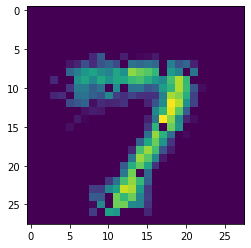

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0328 - mean_absolute_error: 0.0749
Epoch 11/100
1869/1875 [============================>.] - ETA: 0s - loss: 0.0315 - mean_absolute_error: 0.0724

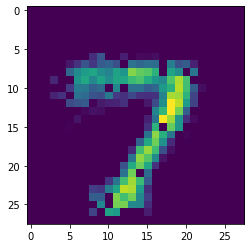

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0315 - mean_absolute_error: 0.0724
Epoch 12/100
1853/1875 [============================>.] - ETA: 0s - loss: 0.0304 - mean_absolute_error: 0.0704- ETA: 2s

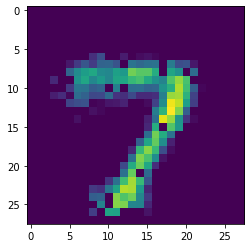

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0304 - mean_absolute_error: 0.0704
Epoch 13/100
1872/1875 [============================>.] - ETA: 0s - loss: 0.0295 - mean_absolute_error: 0.0685- ETA: 0s - loss: 0.0296 - mean_absol

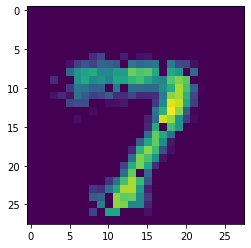

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0295 - mean_absolute_error: 0.0685
Epoch 14/100
1866/1875 [============================>.] - ETA: 0s - loss: 0.0286 - mean_absolute_error: 0.0669

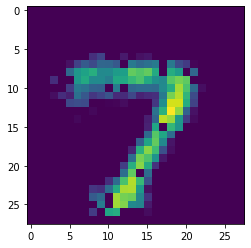

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0286 - mean_absolute_error: 0.0669
Epoch 15/100
1871/1875 [============================>.] - ETA: 0s - loss: 0.0279 - mean_absolute_error: 0.0655

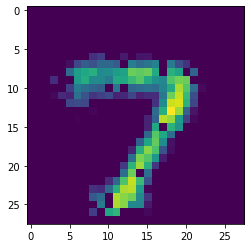

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0279 - mean_absolute_error: 0.0655
Epoch 16/100
1846/1875 [============================>.] - ETA: 0s - loss: 0.0272 - mean_absolute_error: 0.0642

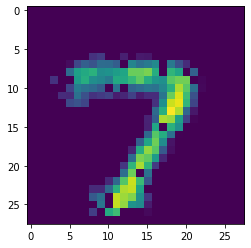

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0272 - mean_absolute_error: 0.0642
Epoch 17/100
1840/1875 [============================>.] - ETA: 0s - loss: 0.0266 - mean_absolute_error: 0.0630

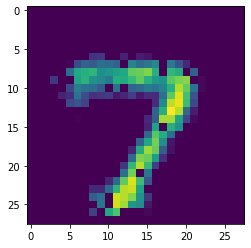

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0266 - mean_absolute_error: 0.0630
Epoch 18/100
1841/1875 [============================>.] - ETA: 0s - loss: 0.0261 - mean_absolute_error: 0.0620- ETA: 1s - loss: 0.0262 - mean_ab

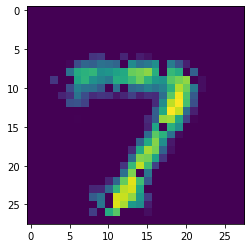

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0261 - mean_absolute_error: 0.0620
Epoch 19/100
1870/1875 [============================>.] - ETA: 0s - loss: 0.0256 - mean_absolute_error: 0.0610

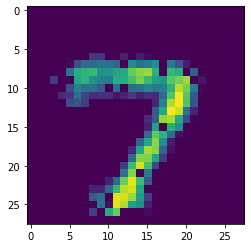

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0256 - mean_absolute_error: 0.0610
Epoch 20/100
1865/1875 [============================>.] - ETA: 0s - loss: 0.0251 - mean_absolute_error: 0.0601

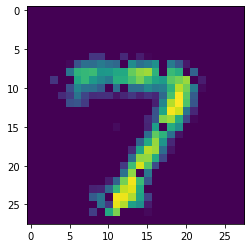

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0251 - mean_absolute_error: 0.0601
Epoch 21/100
1871/1875 [============================>.] - ETA: 0s - loss: 0.0247 - mean_absolute_error: 0.0593

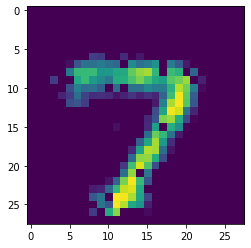

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0247 - mean_absolute_error: 0.0593
Epoch 22/100
1842/1875 [============================>.] - ETA: 0s - loss: 0.0243 - mean_absolute_error: 0.0585

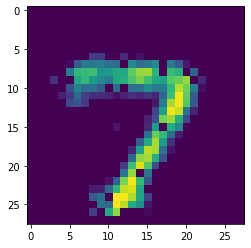

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0243 - mean_absolute_error: 0.0585
Epoch 23/100
1870/1875 [============================>.] - ETA: 0s - loss: 0.0239 - mean_absolute_error: 0.0578

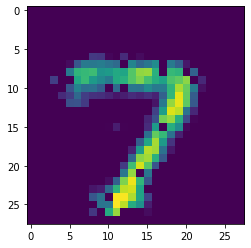

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0239 - mean_absolute_error: 0.0578
Epoch 24/100
1875/1875 [==============================] - ETA: 0s - loss: 0.0236 - mean_absolute_error: 0.0571

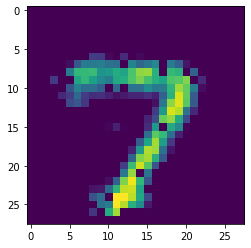

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0236 - mean_absolute_error: 0.0571
Epoch 25/100
1875/1875 [==============================] - ETA: 0s - loss: 0.0232 - mean_absolute_error: 0.0564

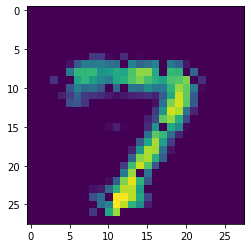

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0232 - mean_absolute_error: 0.0564
Epoch 26/100
1846/1875 [============================>.] - ETA: 0s - loss: 0.0229 - mean_absolute_error: 0.0558

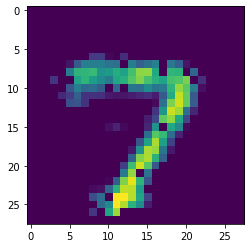

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0229 - mean_absolute_error: 0.0558
Epoch 27/100
1875/1875 [==============================] - ETA: 0s - loss: 0.0226 - mean_absolute_error: 0.0552- ETA: 2s 

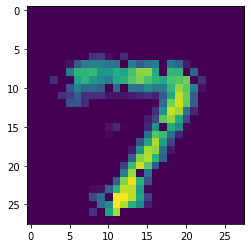

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0226 - mean_absolute_error: 0.0552
Epoch 28/100
1844/1875 [============================>.] - ETA: 0s - loss: 0.0224 - mean_absolute_error: 0.0547

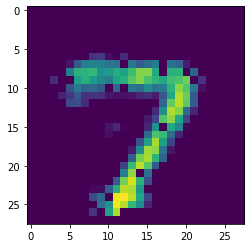

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0224 - mean_absolute_error: 0.0547
Epoch 29/100
1859/1875 [============================>.] - ETA: 0s - loss: 0.0221 - mean_absolute_error: 0.0542

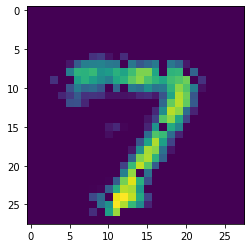

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0221 - mean_absolute_error: 0.0542
Epoch 30/100
1873/1875 [============================>.] - ETA: 0s - loss: 0.0219 - mean_absolute_error: 0.0537

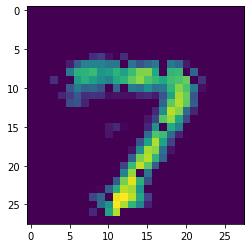

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0219 - mean_absolute_error: 0.0537
Epoch 31/100
1850/1875 [============================>.] - ETA: 0s - loss: 0.0217 - mean_absolute_error: 0.0533

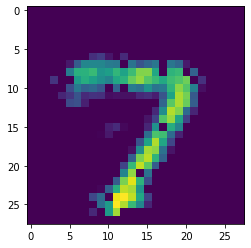

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0216 - mean_absolute_error: 0.0532
Epoch 32/100
1847/1875 [============================>.] - ETA: 0s - loss: 0.0214 - mean_absolute_error: 0.0528

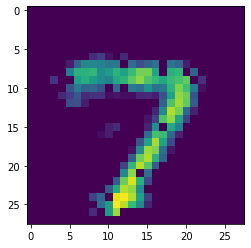

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0214 - mean_absolute_error: 0.0528
Epoch 33/100
1847/1875 [============================>.] - ETA: 0s - loss: 0.0212 - mean_absolute_error: 0.0524

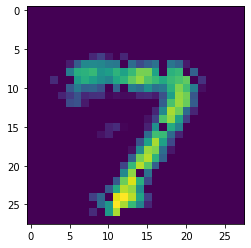

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0212 - mean_absolute_error: 0.0524
Epoch 34/100
1873/1875 [============================>.] - ETA: 0s - loss: 0.0210 - mean_absolute_error: 0.0520

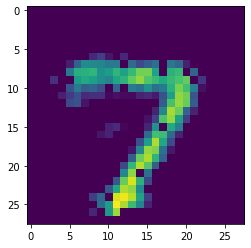

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0210 - mean_absolute_error: 0.0520
Epoch 35/100
1860/1875 [============================>.] - ETA: 0s - loss: 0.0208 - mean_absolute_error: 0.0516

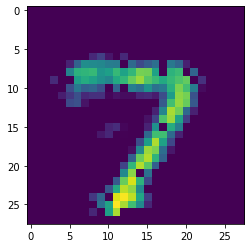

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0208 - mean_absolute_error: 0.0516
Epoch 36/100
1842/1875 [============================>.] - ETA: 0s - loss: 0.0207 - mean_absolute_error: 0.0512

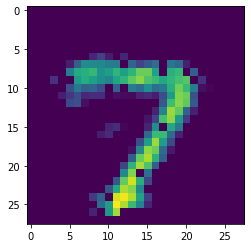

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0207 - mean_absolute_error: 0.0513
Epoch 37/100
1851/1875 [============================>.] - ETA: 0s - loss: 0.0205 - mean_absolute_error: 0.0509

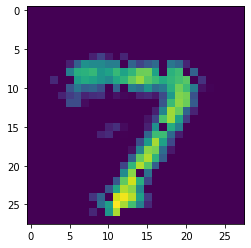

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0205 - mean_absolute_error: 0.0509
Epoch 38/100
1875/1875 [==============================] - ETA: 0s - loss: 0.0203 - mean_absolute_error: 0.0506

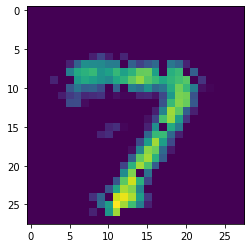

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0203 - mean_absolute_error: 0.0506
Epoch 39/100
1863/1875 [============================>.] - ETA: 0s - loss: 0.0202 - mean_absolute_error: 0.0503

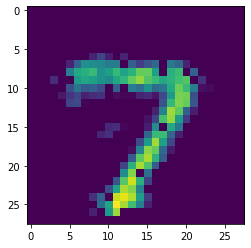

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0202 - mean_absolute_error: 0.0503
Epoch 40/100
1861/1875 [============================>.] - ETA: 0s - loss: 0.0200 - mean_absolute_error: 0.0500

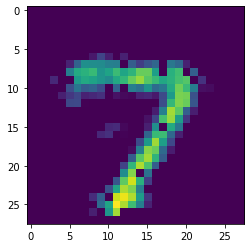

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0200 - mean_absolute_error: 0.0500
Epoch 41/100
1845/1875 [============================>.] - ETA: 0s - loss: 0.0199 - mean_absolute_error: 0.0497

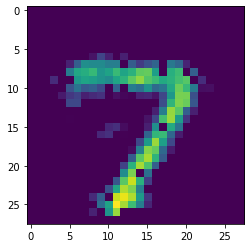

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0199 - mean_absolute_error: 0.0497
Epoch 42/100
1846/1875 [============================>.] - ETA: 0s - loss: 0.0198 - mean_absolute_error: 0.0494

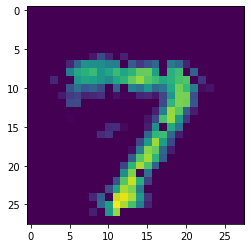

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0198 - mean_absolute_error: 0.0494
Epoch 43/100
1859/1875 [============================>.] - ETA: 0s - loss: 0.0196 - mean_absolute_error: 0.0491

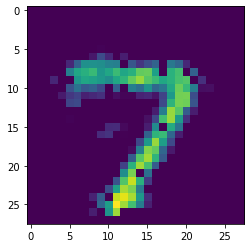

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0196 - mean_absolute_error: 0.0491
Epoch 44/100
1847/1875 [============================>.] - ETA: 0s - loss: 0.0195 - mean_absolute_error: 0.0489- ETA: 1s - loss: 0.0195 - mean_

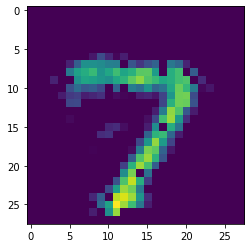

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0195 - mean_absolute_error: 0.0489
Epoch 45/100
1854/1875 [============================>.] - ETA: 0s - loss: 0.0194 - mean_absolute_error: 0.0486

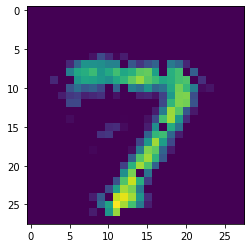

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0194 - mean_absolute_error: 0.0486
Epoch 46/100
1870/1875 [============================>.] - ETA: 0s - loss: 0.0193 - mean_absolute_error: 0.0484

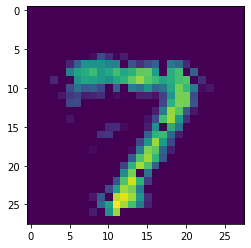

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0193 - mean_absolute_error: 0.0484
Epoch 47/100
1875/1875 [==============================] - ETA: 0s - loss: 0.0192 - mean_absolute_error: 0.0481- E

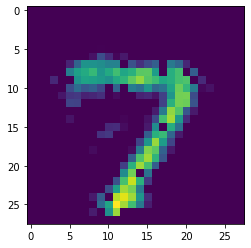

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0192 - mean_absolute_error: 0.0481
Epoch 48/100
1861/1875 [============================>.] - ETA: 0s - loss: 0.0191 - mean_absolute_error: 0.0479

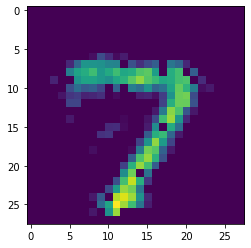

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0191 - mean_absolute_error: 0.0479
Epoch 49/100
1872/1875 [============================>.] - ETA: 0s - loss: 0.0190 - mean_absolute_error: 0.0477

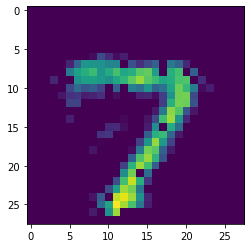

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0190 - mean_absolute_error: 0.0477
Epoch 50/100
1854/1875 [============================>.] - ETA: 0s - loss: 0.0189 - mean_absolute_error: 0.0475

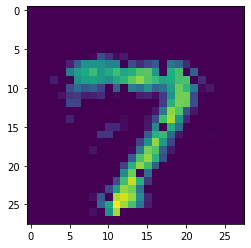

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0189 - mean_absolute_error: 0.0475
Epoch 51/100
1858/1875 [============================>.] - ETA: 0s - loss: 0.0188 - mean_absolute_error: 0.0473

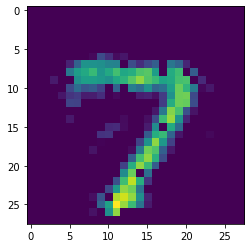

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0188 - mean_absolute_error: 0.0473
Epoch 52/100
1852/1875 [============================>.] - ETA: 0s - loss: 0.0187 - mean_absolute_error: 0.0471

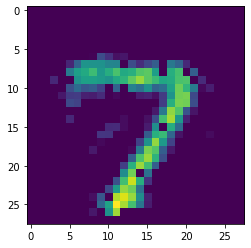

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0187 - mean_absolute_error: 0.0471
Epoch 53/100
1843/1875 [============================>.] - ETA: 0s - loss: 0.0186 - mean_absolute_error: 0.0469

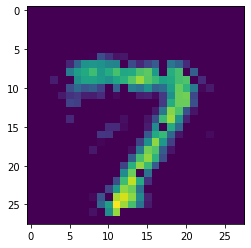

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0186 - mean_absolute_error: 0.0469
Epoch 54/100
1845/1875 [============================>.] - ETA: 0s - loss: 0.0185 - mean_absolute_error: 0.0467

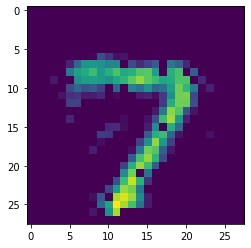

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0185 - mean_absolute_error: 0.0467
Epoch 55/100
1844/1875 [============================>.] - ETA: 0s - loss: 0.0184 - mean_absolute_error: 0.0466

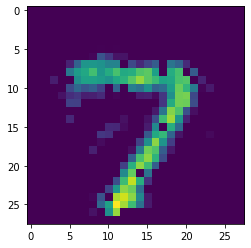

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0184 - mean_absolute_error: 0.0466
Epoch 56/100
1846/1875 [============================>.] - ETA: 0s - loss: 0.0184 - mean_absolute_error: 0.0464

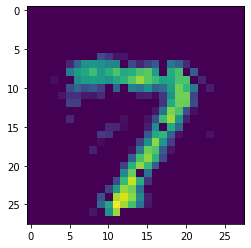

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0184 - mean_absolute_error: 0.0464
Epoch 57/100
1850/1875 [============================>.] - ETA: 0s - loss: 0.0183 - mean_absolute_error: 0.0462

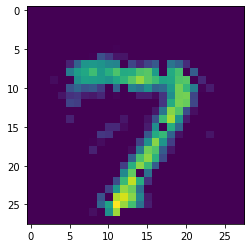

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0183 - mean_absolute_error: 0.0462
Epoch 58/100
1861/1875 [============================>.] - ETA: 0s - loss: 0.0182 - mean_absolute_error: 0.0461

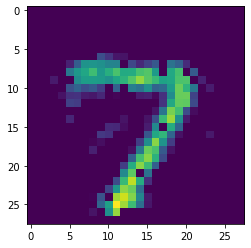

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0182 - mean_absolute_error: 0.0461
Epoch 59/100
1873/1875 [============================>.] - ETA: 0s - loss: 0.0181 - mean_absolute_error: 0.0459

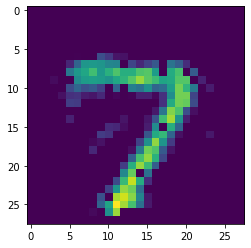

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0181 - mean_absolute_error: 0.0459
Epoch 60/100
1854/1875 [============================>.] - ETA: 0s - loss: 0.0181 - mean_absolute_error: 0.0457

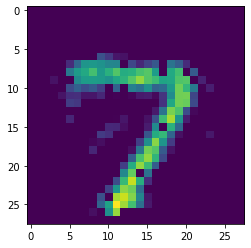

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0181 - mean_absolute_error: 0.0457
Epoch 61/100
1869/1875 [============================>.] - ETA: 0s - loss: 0.0180 - mean_absolute_error: 0.0456- ETA: 1s - loss: 0.0180 - mea

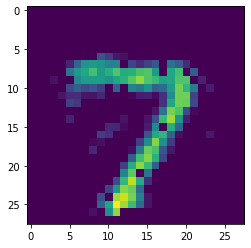

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0180 - mean_absolute_error: 0.0456
Epoch 62/100
1861/1875 [============================>.] - ETA: 0s - loss: 0.0179 - mean_absolute_error: 0.0455

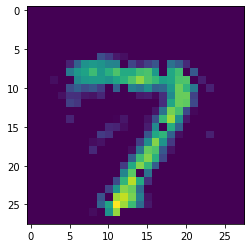

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0179 - mean_absolute_error: 0.0455
Epoch 63/100
1856/1875 [============================>.] - ETA: 0s - loss: 0.0179 - mean_absolute_error: 0.0453

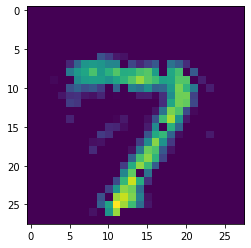

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0179 - mean_absolute_error: 0.0453
Epoch 64/100
1867/1875 [============================>.] - ETA: 0s - loss: 0.0178 - mean_absolute_error: 0.0452

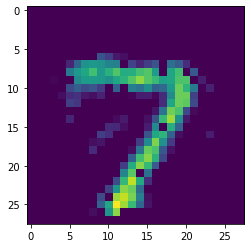

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0178 - mean_absolute_error: 0.0452
Epoch 65/100
1866/1875 [============================>.] - ETA: 0s - loss: 0.0177 - mean_absolute_error: 0.0450

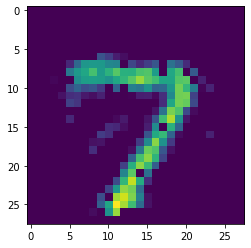

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0177 - mean_absolute_error: 0.0450
Epoch 66/100
1855/1875 [============================>.] - ETA: 0s - loss: 0.0177 - mean_absolute_error: 0.0449

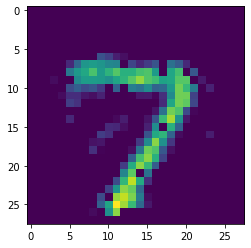

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0177 - mean_absolute_error: 0.0449
Epoch 67/100
1842/1875 [============================>.] - ETA: 0s - loss: 0.0176 - mean_absolute_error: 0.0448

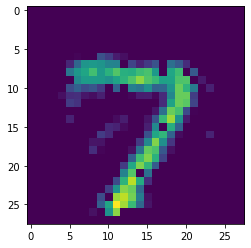

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0176 - mean_absolute_error: 0.0448
Epoch 68/100
1851/1875 [============================>.] - ETA: 0s - loss: 0.0176 - mean_absolute_error: 0.0446

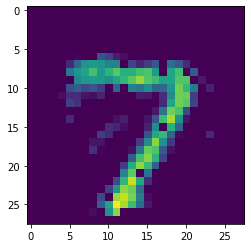

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0176 - mean_absolute_error: 0.0447
Epoch 69/100
1846/1875 [============================>.] - ETA: 0s - loss: 0.0175 - mean_absolute_error: 0.0445

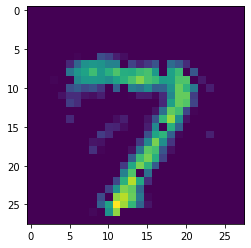

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0175 - mean_absolute_error: 0.0445
Epoch 70/100
1856/1875 [============================>.] - ETA: 0s - loss: 0.0175 - mean_absolute_error: 0.0444

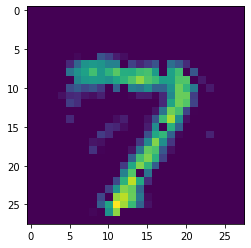

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0175 - mean_absolute_error: 0.0444
Epoch 71/100
1855/1875 [============================>.] - ETA: 0s - loss: 0.0174 - mean_absolute_error: 0.0443

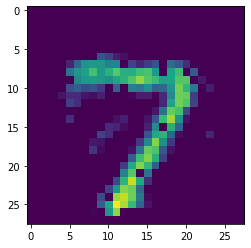

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0174 - mean_absolute_error: 0.0443
Epoch 72/100
1857/1875 [============================>.] - ETA: 0s - loss: 0.0174 - mean_absolute_error: 0.0442

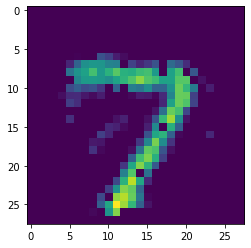

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0174 - mean_absolute_error: 0.0442
Epoch 73/100
1874/1875 [============================>.] - ETA: 0s - loss: 0.0173 - mean_absolute_error: 0.0441- ETA: 0s - loss: 0.0173 - mean_absolute_e

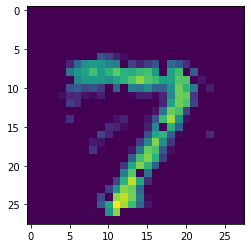

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0173 - mean_absolute_error: 0.0441
Epoch 74/100
1851/1875 [============================>.] - ETA: 0s - loss: 0.0173 - mean_absolute_error: 0.0440

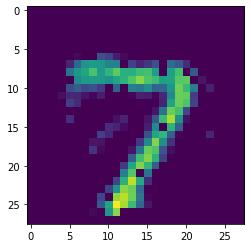

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0173 - mean_absolute_error: 0.0440
Epoch 75/100
1872/1875 [============================>.] - ETA: 0s - loss: 0.0172 - mean_absolute_error: 0.0439

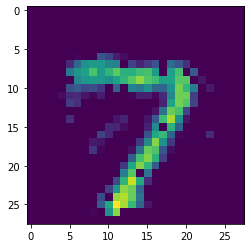

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0172 - mean_absolute_error: 0.0439
Epoch 76/100
1872/1875 [============================>.] - ETA: 0s - loss: 0.0172 - mean_absolute_error: 0.0438

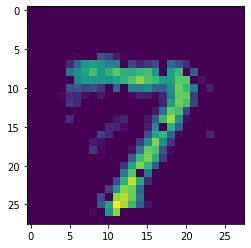

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0172 - mean_absolute_error: 0.0437
Epoch 77/100
1856/1875 [============================>.] - ETA: 0s - loss: 0.0171 - mean_absolute_error: 0.0436

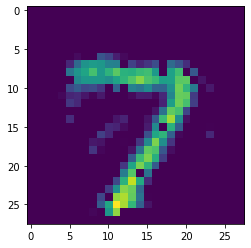

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0171 - mean_absolute_error: 0.0436
Epoch 78/100
1860/1875 [============================>.] - ETA: 0s - loss: 0.0171 - mean_absolute_error: 0.0435

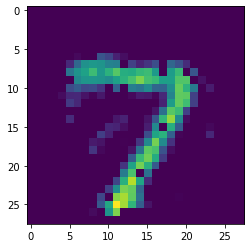

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0171 - mean_absolute_error: 0.0435
Epoch 79/100
1854/1875 [============================>.] - ETA: 0s - loss: 0.0170 - mean_absolute_error: 0.0435

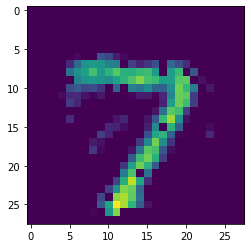

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0170 - mean_absolute_error: 0.0434
Epoch 80/100
1861/1875 [============================>.] - ETA: 0s - loss: 0.0170 - mean_absolute_error: 0.0433

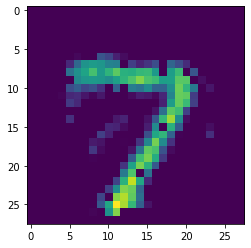

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0170 - mean_absolute_error: 0.0433
Epoch 81/100
1854/1875 [============================>.] - ETA: 0s - loss: 0.0170 - mean_absolute_error: 0.0433

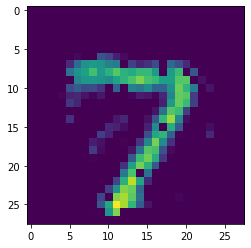

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0170 - mean_absolute_error: 0.0433
Epoch 82/100
1870/1875 [============================>.] - ETA: 0s - loss: 0.0169 - mean_absolute_error: 0.0432

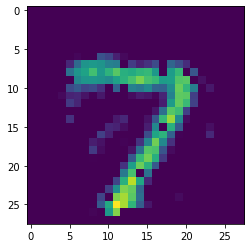

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0169 - mean_absolute_error: 0.0432
Epoch 83/100
1869/1875 [============================>.] - ETA: 0s - loss: 0.0169 - mean_absolute_error: 0.0431

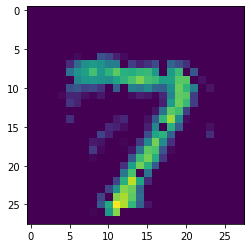

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0169 - mean_absolute_error: 0.0431
Epoch 84/100
1857/1875 [============================>.] - ETA: 0s - loss: 0.0168 - mean_absolute_error: 0.0430

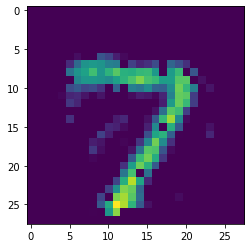

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0168 - mean_absolute_error: 0.0430
Epoch 85/100
1869/1875 [============================>.] - ETA: 0s - loss: 0.0168 - mean_absolute_error: 0.0429

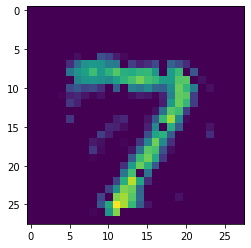

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0168 - mean_absolute_error: 0.0429
Epoch 86/100
1866/1875 [============================>.] - ETA: 0s - loss: 0.0168 - mean_absolute_error: 0.0428- ETA: 1s - loss: 

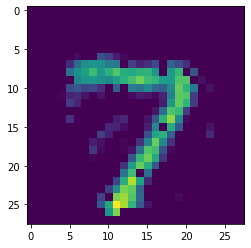

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0168 - mean_absolute_error: 0.0428
Epoch 87/100
1850/1875 [============================>.] - ETA: 0s - loss: 0.0167 - mean_absolute_error: 0.0427

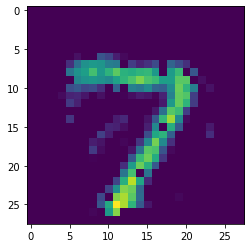

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0167 - mean_absolute_error: 0.0427
Epoch 88/100
1856/1875 [============================>.] - ETA: 0s - loss: 0.0167 - mean_absolute_error: 0.0426

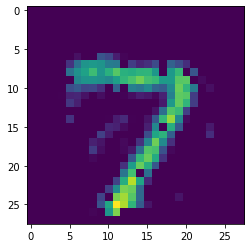

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0167 - mean_absolute_error: 0.0426
Epoch 89/100
1865/1875 [============================>.] - ETA: 0s - loss: 0.0166 - mean_absolute_error: 0.0426

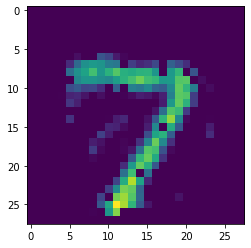

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0166 - mean_absolute_error: 0.0426
Epoch 90/100
1867/1875 [============================>.] - ETA: 0s - loss: 0.0166 - mean_absolute_error: 0.0425

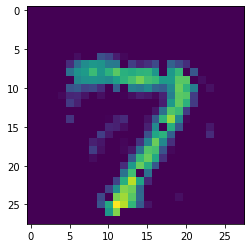

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0166 - mean_absolute_error: 0.0425
Epoch 91/100
1852/1875 [============================>.] - ETA: 0s - loss: 0.0166 - mean_absolute_error: 0.0424- ETA: 0s - loss: 0.0166 - mean_absolute_er

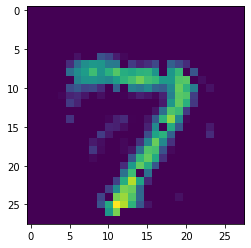

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0166 - mean_absolute_error: 0.0424
Epoch 92/100
1849/1875 [============================>.] - ETA: 0s - loss: 0.0165 - mean_absolute_error: 0.0423

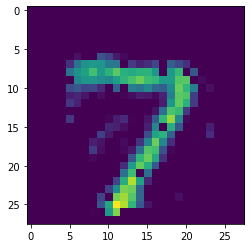

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0165 - mean_absolute_error: 0.0423
Epoch 93/100
1842/1875 [============================>.] - ETA: 0s - loss: 0.0165 - mean_absolute_error: 0.0422

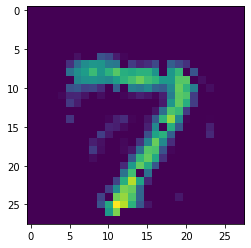

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0165 - mean_absolute_error: 0.0422
Epoch 94/100
1864/1875 [============================>.] - ETA: 0s - loss: 0.0165 - mean_absolute_error: 0.0422

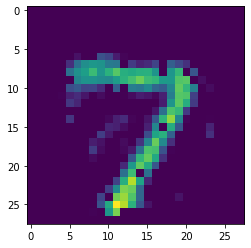

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0165 - mean_absolute_error: 0.0422
Epoch 95/100
1863/1875 [============================>.] - ETA: 0s - loss: 0.0164 - mean_absolute_error: 0.0421

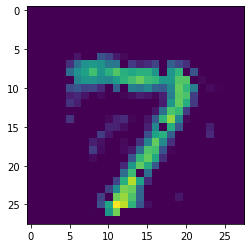

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0164 - mean_absolute_error: 0.0421
Epoch 96/100
1866/1875 [============================>.] - ETA: 0s - loss: 0.0164 - mean_absolute_error: 0.0420- ETA: 1s - loss: 0.01

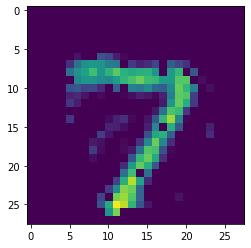

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0164 - mean_absolute_error: 0.0420
Epoch 97/100
1875/1875 [==============================] - ETA: 0s - loss: 0.0164 - mean_absolute_error: 0.0419

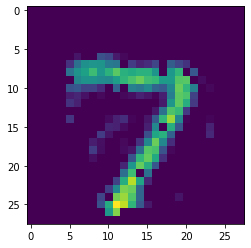

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0164 - mean_absolute_error: 0.0419
Epoch 98/100
1846/1875 [============================>.] - ETA: 0s - loss: 0.0164 - mean_absolute_error: 0.0419

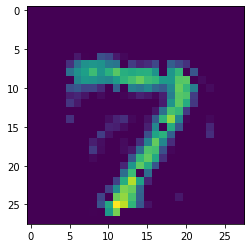

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0164 - mean_absolute_error: 0.0419
Epoch 99/100
1850/1875 [============================>.] - ETA: 0s - loss: 0.0163 - mean_absolute_error: 0.0418

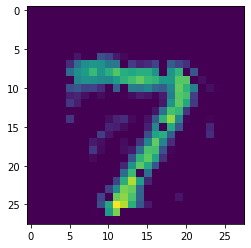

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0163 - mean_absolute_error: 0.0418
Epoch 100/100
1857/1875 [============================>.] - ETA: 0s - loss: 0.0163 - mean_absolute_error: 0.0417

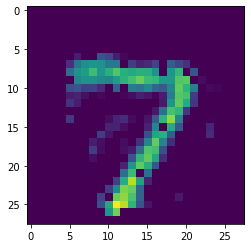

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0163 - mean_absolute_error: 0.0417


In [23]:
inputs = layers.Input(shape=(28,28))
l = layers.Flatten()(inputs)
l = layers.Dense(128, activation="relu")(l)
l = layers.Dense(64, activation="relu")(l)
encoder = keras.Model(inputs=inputs, outputs=l)

code = l = layers.Input(shape=(64,))


l = layers.Dense(128, activation="relu")(l)
l = outputs = layers.Dense(784, activation="relu")(l)
l = layers.Reshape((28,28))(l)
decoder = keras.Model(inputs=code,outputs=l)


# Build the model
model = keras.Model(inputs=inputs, outputs=decoder(encoder(inputs)))
model.summary()

# Compile and fit
model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-6),
             loss=keras.losses.mse,
             metrics=[keras.metrics.mae])

class ImshowCallback(keras.callbacks.Callback):
    def on_epoch_end(self, *args, **kwargs):
        self.imshow()
        return super().on_epoch_end(*args,**kwargs)
        
    def imshow(*args,**kwargs):
        plt.imshow(model.predict(x_test[:2])[0])
        plt.show()

plt.imshow(x_test[0])
plt.show()
model.fit(x_train, x_train, epochs=100, callbacks=[
    ImshowCallback(),
    keras.callbacks.EarlyStopping('loss', patience=2)])

In [24]:
# Let's check how it works as dimentionality reduction

In [25]:
CX_train = encoder.predict(x_train)
CX_test = encoder.predict(x_test)

In [26]:

l = inputs = layers.Input(shape=(64, ))
l = layers.Dense(32 ,activation="relu")(l)
outputs = layers.Dense(10, activation="softmax")(l)


# Build the model
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

# Compile and fit
model.compile(optimizer="adam",
             loss=keras.losses.categorical_crossentropy,
             metrics=[keras.metrics.categorical_accuracy])

model.fit(CX_train, y_train, epochs=100, callbacks=[keras.callbacks.EarlyStopping('loss', patience=2)])

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 2,410
Trainable params: 2,410
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1875/1875 [==============================] - 1s 768us/step - loss: 0.8506 - categorical_accuracy: 0.7420
Epoch 2/100
1875/1875 [==============================] - 1s 758us/step - loss: 0.4138 - categorical_accuracy: 0.8781
Epoch 3/100
1875/1875 [==============================] - 1s 797us/step - loss: 0.3634 - categorical_accuracy: 0.8940
Epoch 4/100
1875/1875 [=============

In [28]:
pred = model.predict(encoder.predict(x_test))
y_pred = y_encoder.inverse_transform(pred.round())
cm = confusion_matrix(y_pred, y_test.reshape(-1,1))
(cm/cm.sum(axis=1)*100).round(2).astype(int)

array([[91,  0,  2,  0,  0,  1,  1,  0,  1,  1],
       [ 0, 98,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 97,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 91,  0,  4,  0,  0,  2,  1],
       [ 0,  0,  0,  0, 97,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 98,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1, 95,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 92,  1,  2],
       [ 0,  0,  1,  1,  0,  3,  0,  0, 91,  1],
       [ 0,  0,  0,  0,  3,  0,  0,  0,  0, 94]])